In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

data_model=pd.read_csv('client_1_5_as_model.csv')
data_model

,employee,hourly_salary,full_time_equivalent,hourly_salary_plus_fte,weekly_salary,monthly_salary,quasi_predicted_salary,raw_salary_difference,SD,pay_label,...,norm_salary_division,post_name,norm_salary_post_name,job_level,norm_salary_job_level,job_group,norm_salary_job_group,ethnic_origin,ethnic_grouping,white_bame
0,1,294.0,0.0,29.0,1029.0,4457.0,9656.901340,-5199.901340,-0.985396,underpaid,...,3383.596059,Director,6377.000000,Director,15212.923077,6.0,17301.375000,British/English/Welsh/Northern Irish/Scottish,White,White
1,2,235.0,0.0,28.0,987.0,4279.0,9656.901340,-5377.901340,-1.000000,underpaid,...,3383.596059,Director,6377.000000,Director,15212.923077,6.0,17301.375000,British/English/Welsh/Northern Irish/Scottish,White,White
2,3,220.0,1.0,220.0,7692.0,33333.0,14405.378566,18927.621434,0.994144,overpaid,...,3203.613076,Chief Executive Officer - Claims Solutions,33333.000000,Director,15212.923077,6.0,17301.375000,Any other White background,White,White
3,4,192.0,1.0,192.0,6731.0,29167.0,10168.006802,18998.993198,1.000000,overpaid,...,5637.668449,Salaried Partner,10942.101266,Salaried Partner,10949.276730,6.0,17301.375000,Any other White background,White,White
4,5,175.0,1.0,175.0,6127.0,26551.0,13691.701340,12859.298660,0.496269,overpaid,...,3383.596059,Finance Director,26551.000000,Director,15212.923077,6.0,17301.375000,British/English/Welsh/Northern Irish/Scottish,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,2240,7.0,1.0,7.0,231.0,999.0,2226.263923,-1227.263923,-0.659461,underpaid,...,3383.596059,Finance Apprentice,999.000000,Other Trainee/Apprentice,1178.882353,1.0,1992.952466,British/English/Welsh/Northern Irish/Scottish,White,White
2240,2241,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,underpaid,...,3383.596059,QA Apprentice,999.000000,Support Staff,2203.408602,1.0,1992.952466,British/English/Welsh/Northern Irish/Scottish,White,White
2241,2242,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,underpaid,...,3383.596059,IT Service Desk Apprentice,999.000000,Support Staff,2203.408602,1.0,1992.952466,Any other Mixed/Multiple background,Mixed,BAME
2242,2243,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,underpaid,...,3383.596059,Bids Apprentice,999.000000,Support Staff,2203.408602,1.0,1992.952466,Any other White background,White,White


In [2]:
list(data_model.columns)
print (data_model.dtypes)
np.shape(data_model)

employee                    int64
hourly_salary             float64
full_time_equivalent      float64
hourly_salary_plus_fte    float64
weekly_salary             float64
monthly_salary            float64
quasi_predicted_salary    float64
raw_salary_difference     float64
SD                        float64
pay_label                  object
numeric_pay_label           int64
annual_salary             float64
bonus_non_voucher         float64
total_bonus               float64
bonus_tf                     bool
salary_plus_bonus         float64
gender                     object
location                   object
norm_salary_location      float64
division                   object
norm_salary_division      float64
post_name                  object
norm_salary_post_name     float64
job_level                  object
norm_salary_job_level     float64
job_group                 float64
norm_salary_job_group     float64
ethnic_origin              object
ethnic_grouping            object
white_bame    

(2244, 30)

In [3]:
X = np.array(data_model.select_dtypes(include='number'))
y = np.array(data_model['pay_label']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3) #p=2 is euclidean default
knn.fit (X_train, y_train)    
        
print('KNN Score for the Training Data :',knn.score(X_train, y_train)) 
print('KNN Score for the Ttesting Data :',knn.score(X_test, y_test))

#https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

KNN Score for the Training Data : 0.9536541889483066
KNN Score for the Ttesting Data : 0.9162210338680927


In [4]:
np.shape(X)

(2244, 20)

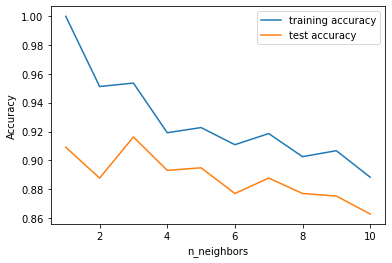

In [5]:
training_accuracy =[]
test_accuracy =[]
#try n neighbours 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    knn2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn2.fit (X_train, y_train)
    training_accuracy.append(knn2.score(X_train, y_train))
    test_accuracy.append(knn2.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

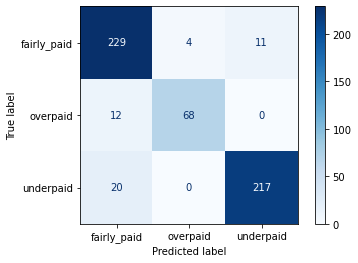

In [6]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.show()


In [7]:
Pa = 229/(229+12+20)
Ra = 229/(229+4+11)

Pb = 68/(68+4+0)
Rb = 68/(68+12+0)

Pc = 217/(217+0+11)
Rc = 217/(217+0+20)

P = ((Pa*(229+4+11))+(Pb*(68+12+0))+(Pc*(217+0+20)))/(220+4+11+12+68+20+217)
R = ((Ra*(229+4+11))+(Rb*(68+12+0))+(Rc*(217+0+20)))/(220+4+11+12+68+20+217)

F1_Score = (2*P*R)/(P+R)
F1_Score

0.9322502028131701

In [8]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print('CV Scores from Training the Model :',cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

CV Scores from Training the Model : [0.36971047 0.72383073 0.6636971  0.77505568 0.50892857]
cv_scores mean: 0.6082445116131086


In [9]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

#check top performing n_neighbors value
print('Estimated :',knn_gscv.best_params_)
print('Estimated test score :',knn_gscv.best_score_)

Estimated : {'n_neighbors': 2}
Estimated test score : 0.6408029748647788


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X2 = np.array(data_model.select_dtypes(include='number'))
y2 = np.array(data_model['pay_label']) 


data_model['pay_label'] = data_model['pay_label'].replace("underpaid", 0)
data_model['pay_label'] = data_model['pay_label'].replace("fairly_paid", 1)
data_model['pay_label'] = data_model['pay_label'].replace("overpaid", 2)


df = data_model.select_dtypes(include='number')
del df['employee']
df

,hourly_salary,full_time_equivalent,hourly_salary_plus_fte,weekly_salary,monthly_salary,quasi_predicted_salary,raw_salary_difference,SD,pay_label,numeric_pay_label,annual_salary,bonus_non_voucher,total_bonus,salary_plus_bonus,norm_salary_location,norm_salary_division,norm_salary_post_name,norm_salary_job_level,job_group,norm_salary_job_group
0,294.0,0.0,29.0,1029.0,4457.0,9656.901340,-5199.901340,-0.985396,0,-1,53484.0,0.0,0.0,53484.0,6009.612565,3383.596059,6377.000000,15212.923077,6.0,17301.375000
1,235.0,0.0,28.0,987.0,4279.0,9656.901340,-5377.901340,-1.000000,0,-1,51344.0,0.0,0.0,51344.0,6009.612565,3383.596059,6377.000000,15212.923077,6.0,17301.375000
2,220.0,1.0,220.0,7692.0,33333.0,14405.378566,18927.621434,0.994144,2,1,400000.0,425000.0,425000.0,825000.0,2975.981675,3203.613076,33333.000000,15212.923077,6.0,17301.375000
3,192.0,1.0,192.0,6731.0,29167.0,10168.006802,18998.993198,1.000000,2,1,350004.0,0.0,0.0,350004.0,6009.612565,5637.668449,10942.101266,10949.276730,6.0,17301.375000
4,175.0,1.0,175.0,6127.0,26551.0,13691.701340,12859.298660,0.496269,2,1,318609.0,150000.0,150000.0,468609.0,6009.612565,3383.596059,26551.000000,15212.923077,6.0,17301.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,7.0,1.0,7.0,231.0,999.0,2226.263923,-1227.263923,-0.659461,0,-1,11994.0,0.0,0.0,11994.0,3576.888736,3383.596059,999.000000,1178.882353,1.0,1992.952466
2240,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,0,-1,11994.0,0.0,0.0,11994.0,3576.888736,3383.596059,999.000000,2203.408602,1.0,1992.952466
2241,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,0,-1,11994.0,0.0,0.0,11994.0,3576.888736,3383.596059,999.000000,2203.408602,1.0,1992.952466
2242,7.0,1.0,7.0,231.0,999.0,2431.169173,-1432.169173,-0.676273,0,-1,11994.0,0.0,0.0,11994.0,3576.888736,3383.596059,999.000000,2203.408602,1.0,1992.952466


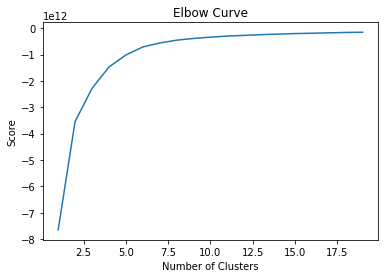

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X2).score(X2) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


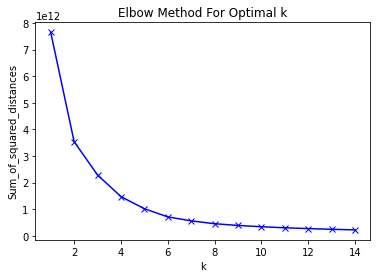

In [12]:
from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# mms.fit(df)
# data_transformed = mms.transform(df)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### MinMaxScaler   

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.  
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f  

In [13]:
from sklearn.metrics import silhouette_score

KMean= KMeans(n_clusters=2)
KMean.fit(df)
label=KMean.predict(df)
#Calculating the silhouette score:
print(f'Silhouette Score(n=2): {silhouette_score(df, label)}')  
print()
print('Closer to 1, the further apart the clusters')


Silhouette Score(n=2): 0.7055109630681636

Closer to 1, the further apart the clusters


In [14]:
# df = pd.DataFrame(X2, y2,columns=[[
#  'hourly_salary',
#  'full_time_equivalent',
#  'hourly_salary_plus_fte',
#  'weekly_salary',
#  'monthly_salary',
#  'quasi_predicted_salary',
#  'raw_salary_difference',
#  'SD',
#  'pay_label',
#  'numeric_pay_label',
#  'annual_salary',
#  'bonus_non_voucher',
#  'total_bonus',
#  'salary_plus_bonus',
#  'norm_salary_location',
#  'norm_salary_division',
#  'norm_salary_post_name',
#  'norm_salary_job_level',
#  'job_group',
#  'norm_salary_job_group']])
# df

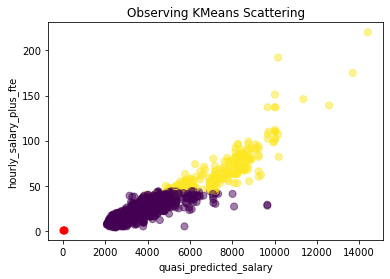

In [15]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['quasi_predicted_salary'], df['hourly_salary_plus_fte'],c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('quasi_predicted_salary')
plt.ylabel('hourly_salary_plus_fte')
plt.title('Observing KMeans Scattering')
plt.show()